In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('vehicles.csv')
dep = df[['manufacturer', 'model', 'price', 'year']] # depreciation datase

In [3]:
MandM_dataset = dep.groupby(by=['manufacturer', 'model']).count()

In [4]:
MandM_dataset[MandM_dataset['price'] >10]

price  year
manufacturer model                                 
acura        3.2 tl                        44    44
             cl                            19    19
             ilx                          156   156
             ilx sedan 4d                  30    30
             integra                       29    29
...                                       ...   ...
volvo        xc90 3.2                      17    17
             xc90 3.2 awd                  20    20
             xc90 3.2 sport utility 4d     12    12
             xc90 awd                      30    30
             xc90 t6 momentum sport        11    11

[3704 rows x 2 columns]

In [5]:
def find_model_manufacturer(df, manufacture, model):
    manu = df[df.manufacturer==manufacture]
    mod = manu[manu.model==model]
    return mod

In [6]:
predict = find_model_manufacturer(dep, 'acura', '3.2 tl')

In [7]:
X = predict['year']
y = predict['price']

In [22]:
model2 = LinearRegression()
reg = model2.fit(X.to_numpy().reshape(-1, 1), y)

In [23]:
reg.score(X.to_numpy().reshape(-1, 1), y)

0.1861975351597155

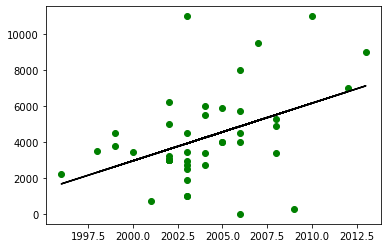

In [25]:
plt.scatter(X, y,color='g')
plt.plot(X, model2.predict(X.to_numpy().reshape(-1, 1)),color='k')

plt.show()

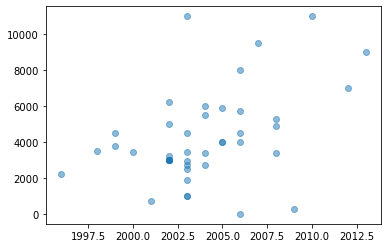

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, y,alpha=0.5)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=42)